##Part 1

In [1]:
%pip install matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install sounddevice scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np 
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import time 
print("Libraries loaded successfully!")

Libraries loaded successfully!


In [6]:
z = 3 + 4j 
print(f'|z| = {np.abs(z)}')
print(f'<z = {np.degrees(np.angle(z)):.2f}degrees')

|z| = 5.0
<z = 53.13degrees


In [9]:
r = 10 
phi_deg = 60 
z = r * np.exp(1j * np.radians(phi_deg))
print(f'z = {z.real:.2f} + {z.imag:.2f}j')


z = 5.00 + 8.66j


In [10]:
X1 = 6 * np.exp(1j * np.radians(0)) # 6∠0°
X2 = 8 * np.exp(1j * np.radians(90)) # 8∠90°
X = X1 + X2
print(f'X = {X.real:.2f} + {X.imag:.2f}j')
print(f'A = {np.abs(X):.2f}')
print(f'φ = {np.degrees(np.angle(X)):.2f}°')

X = 6.00 + 8.00j
A = 10.00
φ = 53.13°


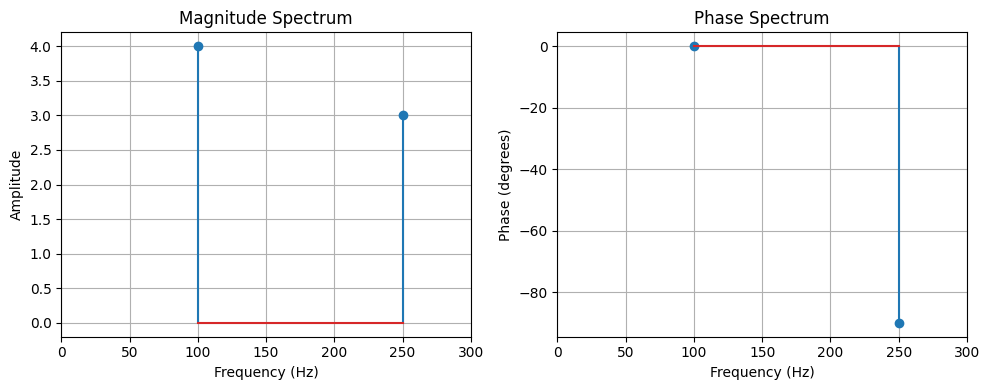

In [11]:
# Enter your values from the table
freqs = [100, 250] # Frequencies in Hz
amps = [4, 3] # Amplitudes
phases_deg = [0, -90] # Phases in degrees
# Plot spectrum
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.stem(freqs, amps)
plt.xlabel('Frequency (Hz)'); plt.ylabel('Amplitude')
plt.title('Magnitude Spectrum'); plt.xlim(0, 300); plt.grid(True)
plt.subplot(1, 2, 2) 
plt.stem(freqs, phases_deg)
plt.xlabel('Frequency (Hz)'); plt.ylabel('Phase (degrees)')
plt.title('Phase Spectrum'); plt.xlim(0, 300); plt.grid(True)
plt.tight_layout(); plt.show()     


In [12]:
fs = 48000  # Sample rate
duration = 3 
total_samples = fs * duration
print(f"Sampling frequency: fs = {fs} Hz")
print(f"Sampling period: Ts = {1/fs*1000:.4f} seconds")
print(f"Duration: {duration} seconds")
print(f"Total samples to record: {total_samples}")

Sampling frequency: fs = 48000 Hz
Sampling period: Ts = 0.0208 seconds
Duration: 3 seconds
Total samples to record: 144000


In [13]:
print("Get ready to say 'Ahhh'...")
for i in range(3, 0, -1):
    print(f"{i}...")
    time.sleep(1)
print(f"Recording for {duration} seconds...")
# Record audio
my_recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait() # Wait until recording finishes
print("Recording complete")

Get ready to say 'Ahhh'...
3...
2...
1...
Recording for 3 seconds...
Recording complete


In [14]:
#playback 
print("Playing back....")
sd.play(my_recording, fs)
sd.wait()
print("Playback complete!")

Playing back....
Playback complete!


Part 2 

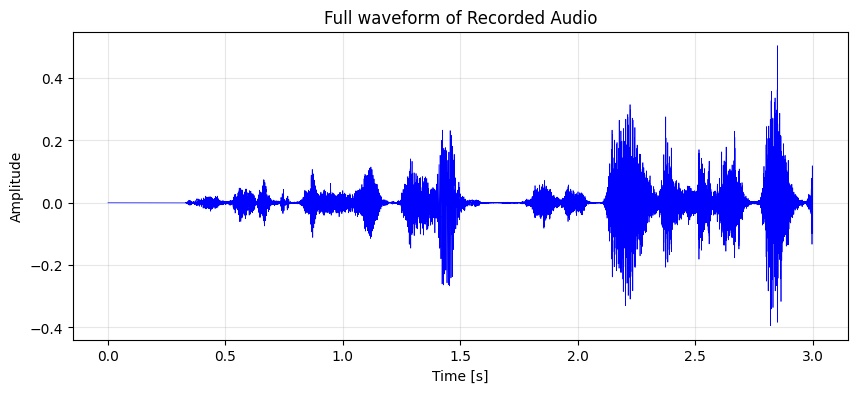

Number of samples recorded: 144000 
Time axis range from t = 0 to t = 3.0000 seconds


In [15]:
#t = n * Ts = n / fs
t = np.arange(len(my_recording)) / fs

plt.figure(figsize=(10, 4))
plt.plot(t, my_recording, color ='blue', linewidth=0.5)
plt.title("Full waveform of Recorded Audio")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.3)
plt.show()

print(f"Number of samples recorded: {len(my_recording)} ")
print(f"Time axis range from t = 0 to t = {t[-1]:.4f} seconds")

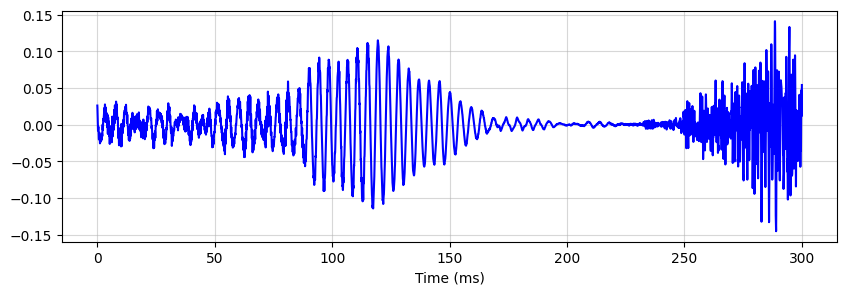

In [25]:
start, end = 1.0, 1.3
idx_s = int(start *fs)
idx_e = int(end * fs)
segment = my_recording[idx_s:idx_e].flatten()# Remove DC Offset (center the signal at 0)
segment = segment - np.mean(segment)
N = len(segment)
t = np.linspace(0, end-start, N)
# Time vector cho đoạn cắ
# t (0 -> 1s)
# Plot the segment to check
t_segment = np.arange(N) / fs * 1000
# Time in ms
plt.figure(figsize=(10, 3))
plt.plot(t_segment, segment, 'b-')
plt.xlabel("Time (ms)")
plt.grid(True,
alpha=0.5)
plt.show()


In [28]:
# DFT using the definition formula
N = len(segment)
n = np.arange(N)
# Frequencies to analyze (0 to 2000 Hz)
freq_max = 2000
k_max = int(freq_max * N / fs)
frequencies = np.arange(k_max + 1) * fs / N
# Compute DFT for each frequency
X = np.zeros(len(frequencies), dtype=complex)
for k in range(len(frequencies)):
# The DFT formula: X[k] = sum of x[n] * e^(-j*2*pi*k*n/N)
    X[k] = np.sum(segment * np.exp(-1j * 2 * np.pi * k * n / N))
# Get magnitude and phase
magnitude = np.abs(X) / N * 2 # Normalize
phase = np.angle(X)
print(f'Computed DFT for {len(frequencies)} frequency bins')
print(f'Frequency resolution: {fs/N:.2f} Hz')

Computed DFT for 601 frequency bins
Frequency resolution: 3.33 Hz


In [25]:
t_ms = t * 1000 

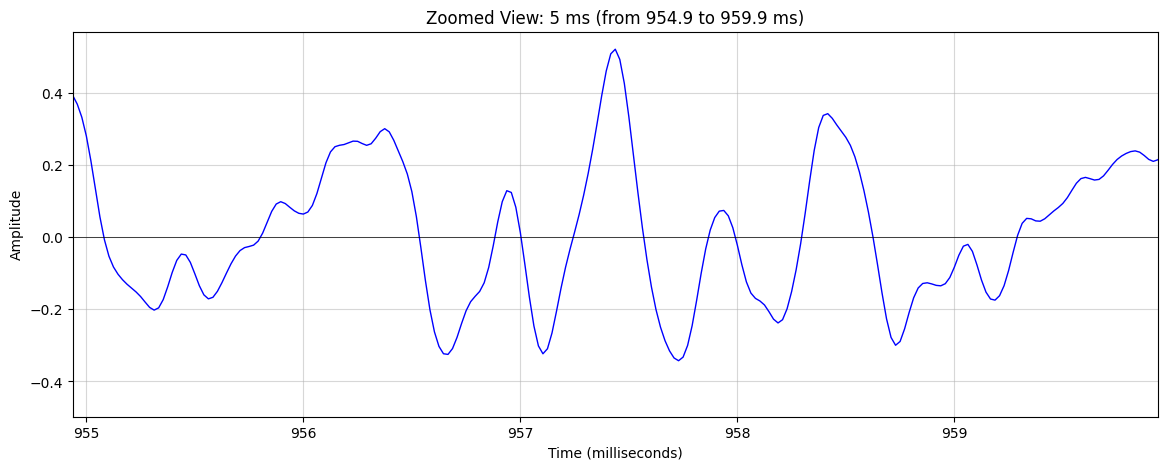

In [33]:
t_ms = t * 1000  #time in milliseconds
peak_time_ms = peak_time * 1000  #peak time in milliseconds

start_ms = peak_time_ms - 2.5  #10ms before peak
end_ms = peak_time_ms + 2.5  #10ms after peak

#plot 
plt.figure(figsize=(14, 5))
plt.plot(t_ms, my_recording, 'b-', linewidth=1)
plt.xlim(start_ms, end_ms)
plt.title(f"Zoomed View: 5 ms (from {start_ms:.1f} to {end_ms:.1f} ms)")
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.show()

In [34]:
target_start =  957
target_end = target_start +  2.0 

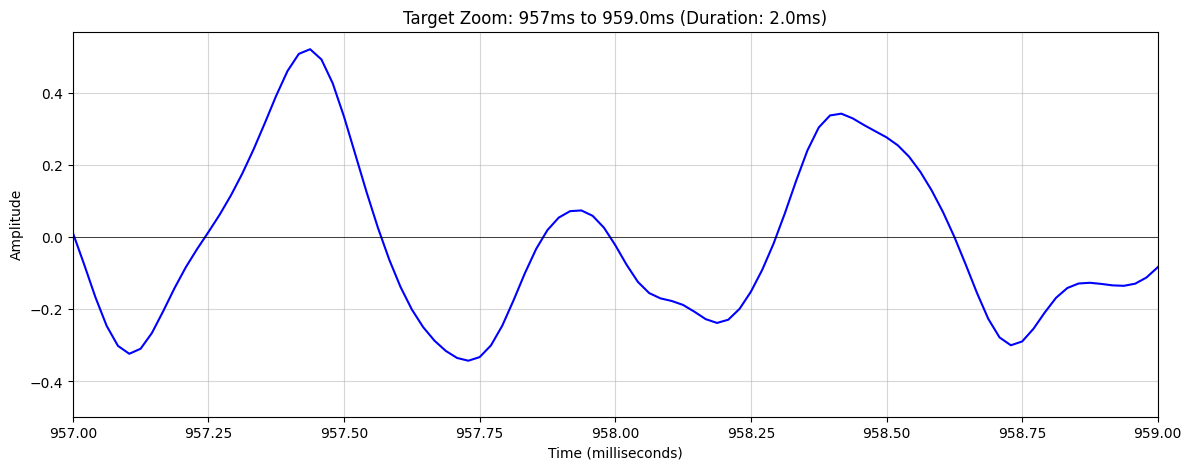

In [35]:
# Plot the selected 2 ms segment
plt.figure(figsize=(14, 5))
plt.plot(t_ms, my_recording, 'b-', linewidth=1.5)
plt.xlim(target_start, target_end)
plt.title(f"Target Zoom: {target_start}ms to {target_end}ms (Duration: 2.0ms)")
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.show()

Part 3

In [36]:
# Find indices for the selected 2 ms segment
idx_start = int((target_start/1000) * fs)
idx_end = int((target_end/1000) * fs)
print(t_ms[idx_start:idx_end])

[957.         957.02083333 957.04166667 957.0625     957.08333333
 957.10416667 957.125      957.14583333 957.16666667 957.1875
 957.20833333 957.22916667 957.25       957.27083333 957.29166667
 957.3125     957.33333333 957.35416667 957.375      957.39583333
 957.41666667 957.4375     957.45833333 957.47916667 957.5
 957.52083333 957.54166667 957.5625     957.58333333 957.60416667
 957.625      957.64583333 957.66666667 957.6875     957.70833333
 957.72916667 957.75       957.77083333 957.79166667 957.8125
 957.83333333 957.85416667 957.875      957.89583333 957.91666667
 957.9375     957.95833333 957.97916667 958.         958.02083333
 958.04166667 958.0625     958.08333333 958.10416667 958.125
 958.14583333 958.16666667 958.1875     958.20833333 958.22916667
 958.25       958.27083333 958.29166667 958.3125     958.33333333
 958.35416667 958.375      958.39583333 958.41666667 958.4375
 958.45833333 958.47916667 958.5        958.52083333 958.54166667
 958.5625     958.58333333 958.604

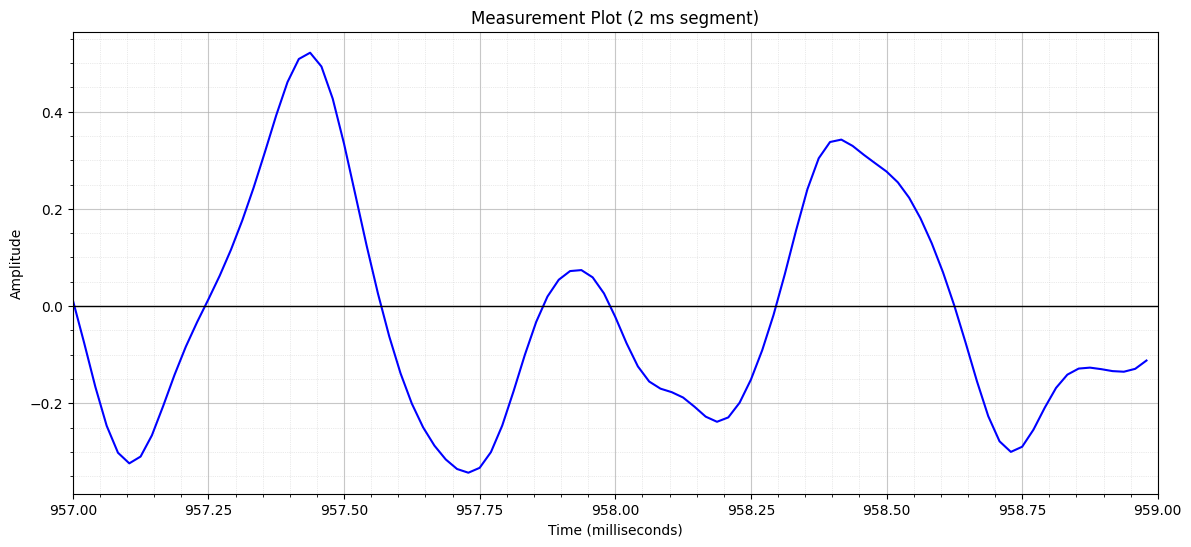

In [40]:
# Plot with dense grid
plt.figure(figsize=(14, 6))
plt.plot(t_ms[idx_start:idx_end], my_recording[idx_start:idx_end],
'b-', linewidth=1.5)
plt.xlim(target_start, target_end)
plt.title("Measurement Plot (2 ms segment)")
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
# Dense grid for easier measurement
plt.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.7)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
plt.axhline(y=0, color='black', linewidth=1)
plt.show()

In [ ]:
# Extract the 2 ms segment
segment = my_recording[idx_start:idx_end]

# Compute peak-to-peak value
ptp_height = (segment.max() - segment.min())/2.0

print(f"Peak-to-peak height: {ptp_height}")
print(f"Max amplitude: {segment.max()}")
print(f"Min amplitude: {segment.min()}")



Peak-to-peak height: 0.4318695068359375
Max amplitude: 0.5211181640625
Min amplitude: -0.342620849609375
Measured Frequency: 56.36978579481395 Hz


Part 4

In [69]:
A_measured = ptp_height  # Amplitude from Step 3.2
f_measured = 350 # Frequency from Step 3.4 (in Hz)
# Create time axis (same range as your 2 ms segment)
t_cos = np.linspace(target_start/1000, target_end/1000, 1000)
# Generate pure cosine: x(t) = A * cos(2*pi*f*t)
x_cos = A_measured * np.cos(2 * np.pi * f_measured * t_cos)
print(f"Pure cosine: x(t) = {A_measured} * cos(2*pi*{f_measured}*t)")
print(f"Phase phi = 0 (not yet determined)")

Pure cosine: x(t) = 0.4318695068359375 * cos(2*pi*350*t)
Phase phi = 0 (not yet determined)


In [70]:
voice_segment = my_recording[idx_start:idx_end].flatten()
t_voice_ms = t_ms[idx_start:idx_end]
# Calculate DC offset (mean value)
DC_offset = np.mean(voice_segment)
print(f"DC offset = {DC_offset:.4f}")
# Remove DC offset
voice_centered = voice_segment - DC_offset
print(f"After removing DC: mean = {np.mean(voice_centered):.6f} (approximately zero)")


DC offset = -0.0234
After removing DC: mean = -0.000000 (approximately zero)


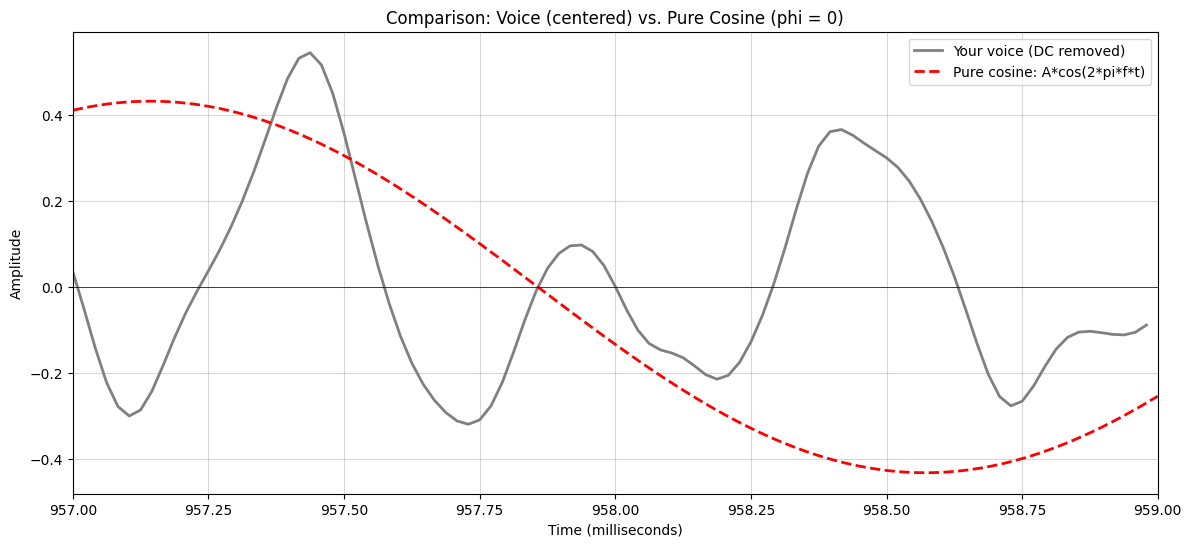

In [71]:
plt.figure(figsize=(14, 6))
plt.plot(t_voice_ms, voice_centered, 'gray', linewidth=2,
label='Your voice (DC removed)')
plt.plot(t_cos*1000, x_cos, 'r--', linewidth=2,
label='Pure cosine: A*cos(2*pi*f*t)')
plt.xlim(target_start, target_end)
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
plt.title("Comparison: Voice (centered) vs. Pure Cosine (phi = 0)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.show()

Part 5

In [63]:
# Enter your calculated phase
phi_measured =  # Phase from Step 5.2 (in radians)
# Generate phase-corrected cosine: x(t) = A * cos(2*pi*f*t + phi)
x_cos_corrected = A_measured * np.cos(2 * np.pi * f_measured * t_cos + phi_measured)
print(f"Phase-corrected cosine:")
print(f"x(t) = {A_measured} * cos(2*pi*{f_measured}*t + {phi_measured:.4f})")

SyntaxError: invalid syntax (1453779862.py, line 2)

In [ ]:

plt.figure(figsize=(14, 6))
# Your voice (DC removed)
plt.plot(t_voice_ms, voice_centered, 'gray', linewidth=2.5,
label='Your voice (DC removed)')
# Phase-corrected cosine
plt.plot(t_cos*1000, x_cos_corrected, 'r-', linewidth=2,
label=f'Cosine with phi = {phi_measured:.2f} rad')
plt.xlim(target_start, target_end)
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
plt.title("Final Result: Voice vs. Phase-Corrected Cosine (In Phase)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.show()
print("")
print("Your voice can be approximated by:")
print(f"x(t) = {A_measured:.4f} * cos(2*pi*{f_measured:.1f}*t + {phi_measured:.4f})")